### Simple Watershed 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border
from PIL import Image

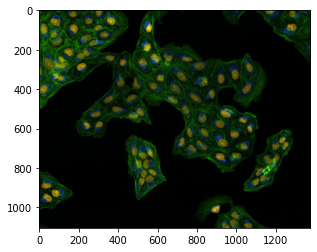

In [2]:
img = cv2.imread('../raw_data/watershed/SimpleExample/Osteosarcoma_01.tif')
plt.imshow(img);

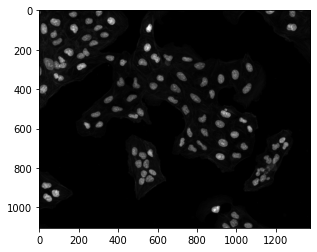

In [3]:
#blue channel, image equivalent to grey image
cell = img[:,:,0]
plt.imshow(cell, cmap='gray');

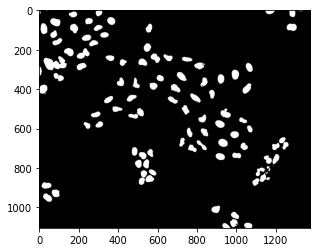

In [4]:
ret1, thresh = cv2.threshold(cell, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

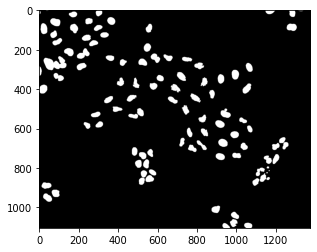

In [5]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

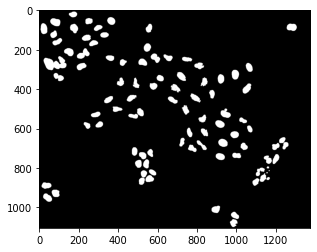

In [6]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

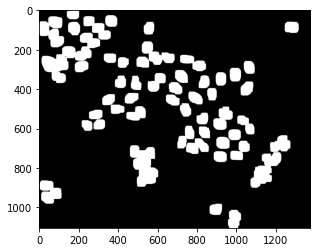

In [7]:
sure_backg = cv2.dilate(opening, kernel, iterations=10)
plt.imshow(sure_backg, cmap='gray');

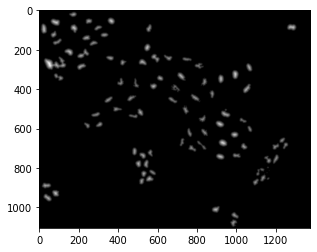

In [8]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray');

In [9]:
dtf_max = dist_transform.max()
print(dtf_max)

21.968996


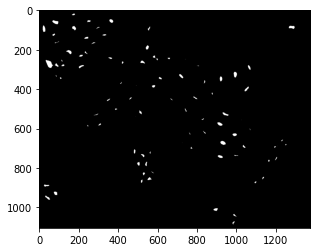

In [10]:
ret2, sure_foreg = cv2.threshold(dist_transform, 0.5*dtf_max, 255, 0)
plt.imshow(sure_foreg, cmap='gray');

In [11]:
sure_foreg = np.uint8(sure_foreg)

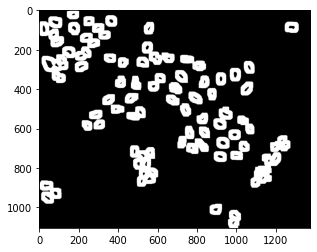

In [12]:
unknown = cv2.subtract(sure_backg,sure_foreg)
plt.imshow(unknown, cmap='gray');

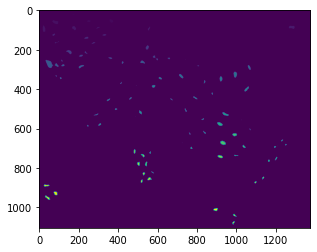

In [13]:
ret3, markers = cv2.connectedComponents(sure_foreg)
plt.imshow(markers);

In [14]:
#background pixel value 0 --> problem
#watershed would consider this as unknown 
#add 10 to all labels so that background is not 0 
markers = markers+10

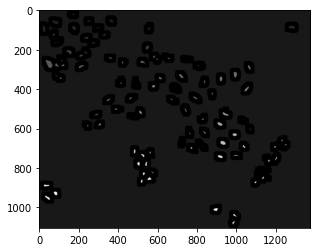

In [15]:
#mark the region of unknown with 0
markers[unknown == 255] = 0
plt.imshow(markers, cmap='gray');

In [16]:
markers = cv2.watershed(img,markers)

In [17]:
img[markers == -1] = [0,255,255]

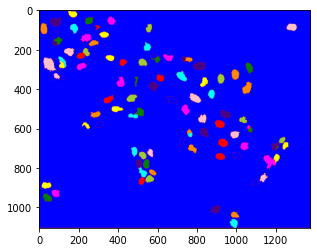

In [18]:
img2 = color.label2rgb(markers, bg_label=0)
plt.imshow(img2);img2 = color.label2rgb(markers, bg_label=0)

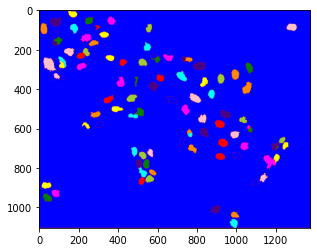

In [19]:
plt.imshow(img2);

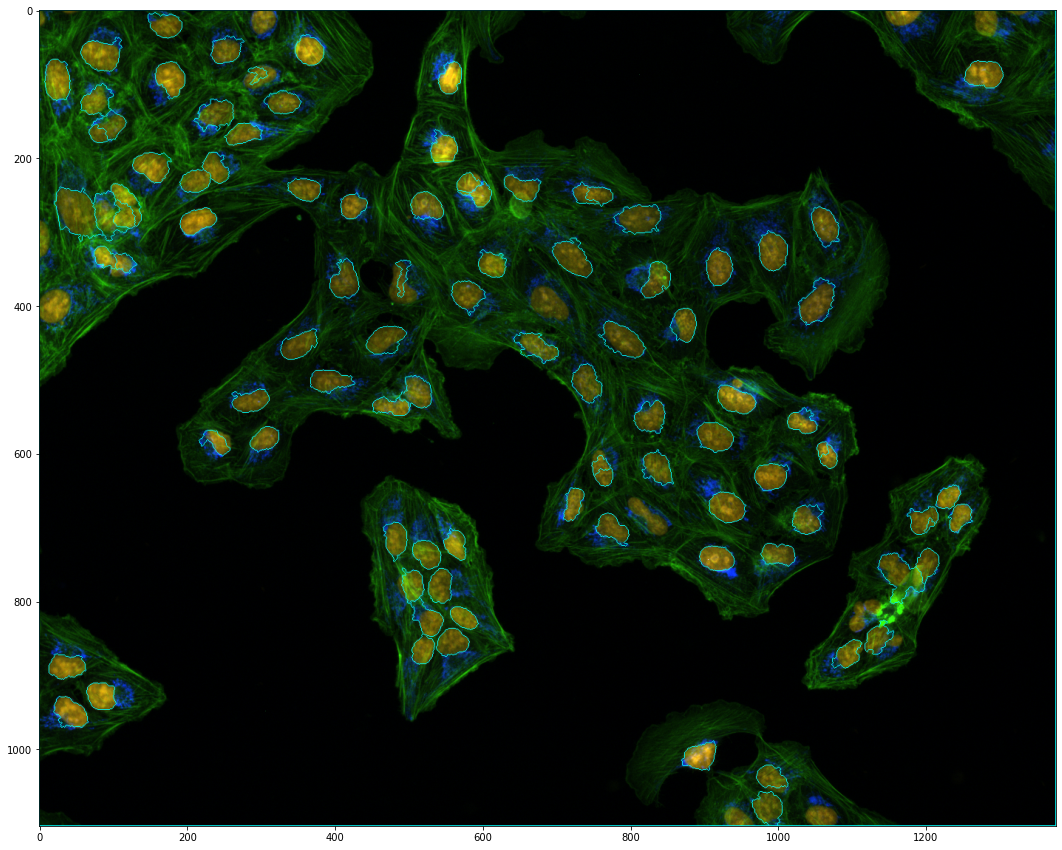

In [20]:
plt.figure(figsize=(20,15))
plt.imshow(img);

### Blood smear 

# Preprocessing

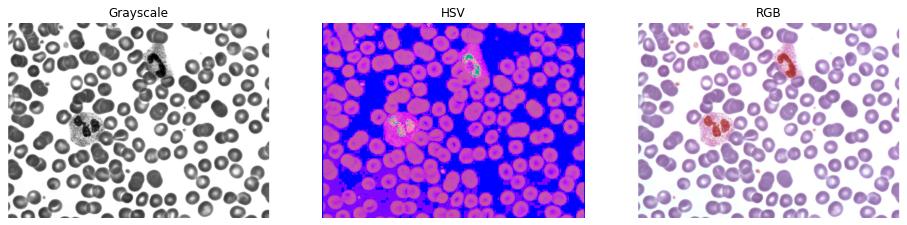

In [21]:
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

rc = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')

rc_gray = rgb2gray(rc)
rc_hsv = rgb2hsv(rc)

plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(rc_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale")
plt.subplot(1,3,2)
plt.imshow(rc_hsv)
plt.axis("off")
plt.title("HSV")
plt.subplot(1,3,3)
plt.imshow(rc)
plt.axis("off")
plt.title("RGB");

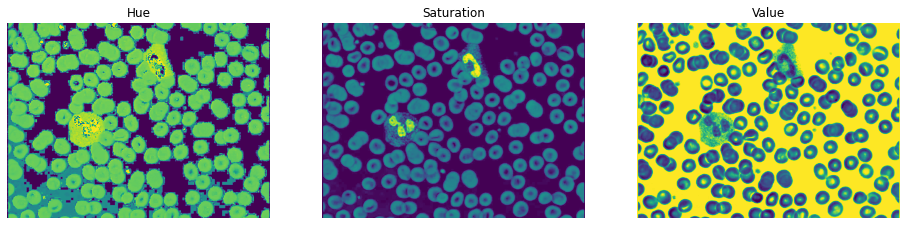

In [22]:
rc_hue = rc_hsv[:,:,0]
rc_sat = rc_hsv[:,:,1]
rc_value = rc_hsv[:,:,2]


plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(rc_hue)
plt.axis("off")
plt.title("Hue")
plt.subplot(1,3,2)
plt.imshow(rc_sat)
plt.axis("off")
plt.title("Saturation")
plt.subplot(1,3,3)
plt.imshow(rc_value)
plt.axis("off")
plt.title("Value");

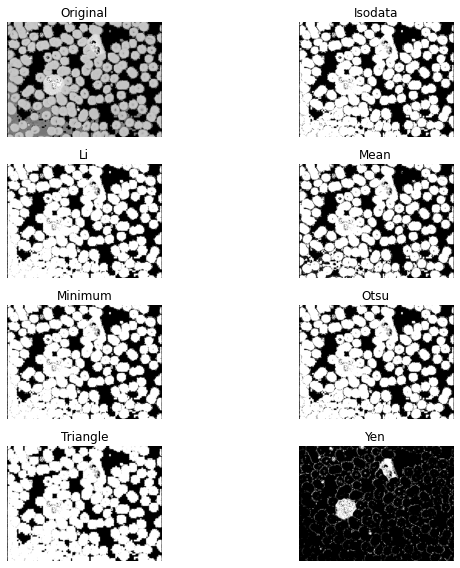

In [23]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(rc_hue, figsize=(10, 8), verbose=False)
plt.show()

In [24]:
from skimage.filters import threshold_yen

rc_yen = threshold_yen(rc_hue)
rc_yen

0.8326605902777777

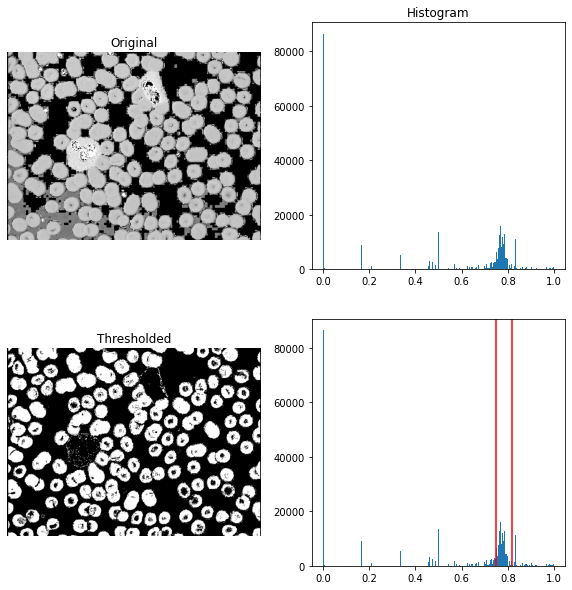

In [25]:
from skimage.filters import threshold_minimum, threshold_otsu, threshold_mean, threshold_isodata, threshold_li, threshold_local
from cv2 import inRange

image = rc_hue


thresh_min = 0.75     #threshold_mean(image)
thresh_max = 0.82

binary = inRange(image, thresh_min, thresh_max) #thresh_max > image > thresh

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap="gray")

ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap="gray")
ax[1, 0].set_title('Thresholded')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')
ax[1, 1].axvline(thresh_max, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

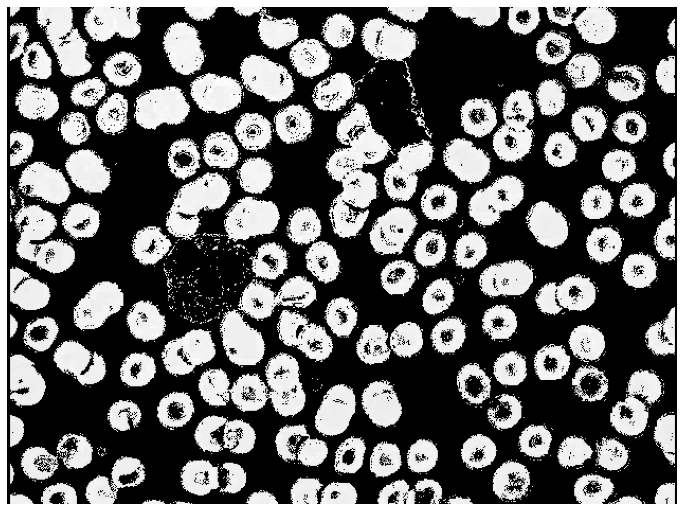

In [26]:
im_pre = binary * rc_hue

plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(im_pre, cmap="gray");

In [27]:
type(im_pre)

numpy.ndarray

In [28]:
im_pre.shape

(470, 633)

In [29]:
im_pre

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ]])

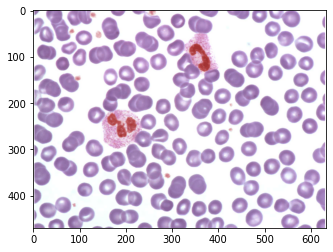

In [31]:
bs = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')
plt.imshow(bs);

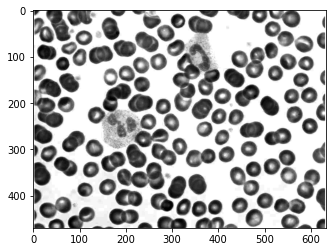

In [32]:
bc = bs[:,:,0]
plt.imshow(bc, cmap='gray');

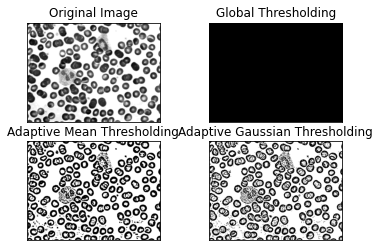

In [33]:
ret,th1 = cv2.threshold(bc,0,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(bc,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(bc,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [bc, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

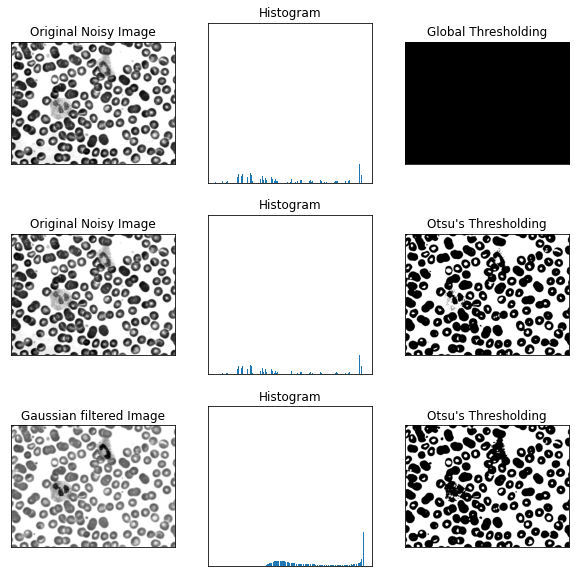

In [34]:
imag = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')

blood = imag[:,:,0]

# global thresholding
ret1,th1 = cv2.threshold(blood,0,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(blood,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
img_b = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img_b,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [bc, 0, th1,
          bc, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

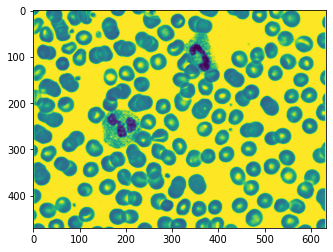

In [48]:
img = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray);

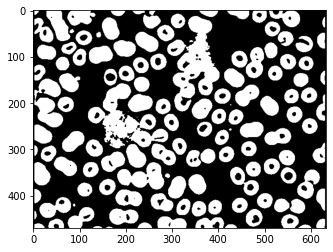

In [36]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

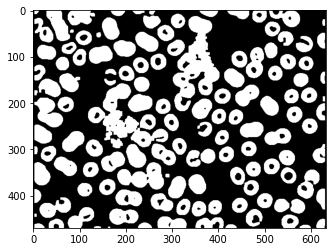

In [37]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

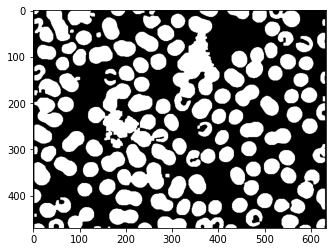

In [38]:
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(opening,[cnt],0,255,-1)


plt.imshow(opening, cmap='gray');

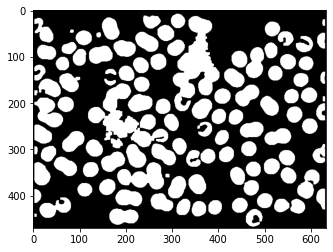

In [39]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

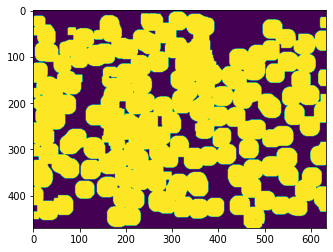

In [40]:
sure_bg = cv2.dilate(opening,kernel,iterations=5)
plt.imshow(sure_bg);

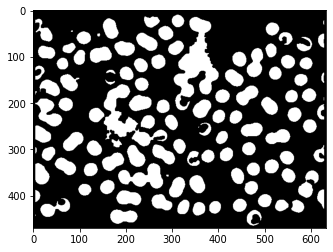

In [41]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray');

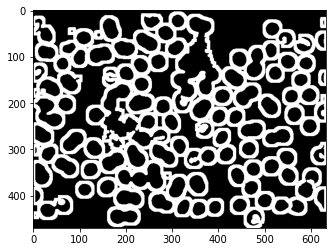

In [42]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray');

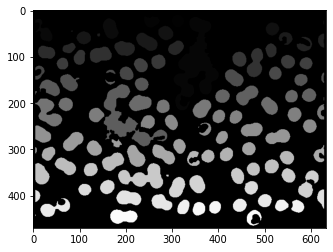

In [43]:
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray');

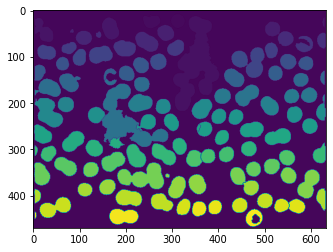

In [44]:
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
plt.imshow(markers);

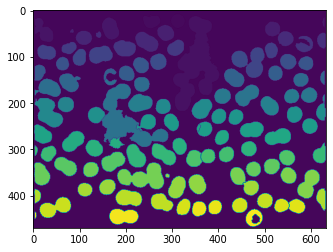

In [45]:
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers);

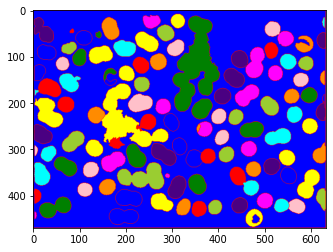

In [46]:
img2 = color.label2rgb(markers, bg_label=0)
plt.imshow(img2);

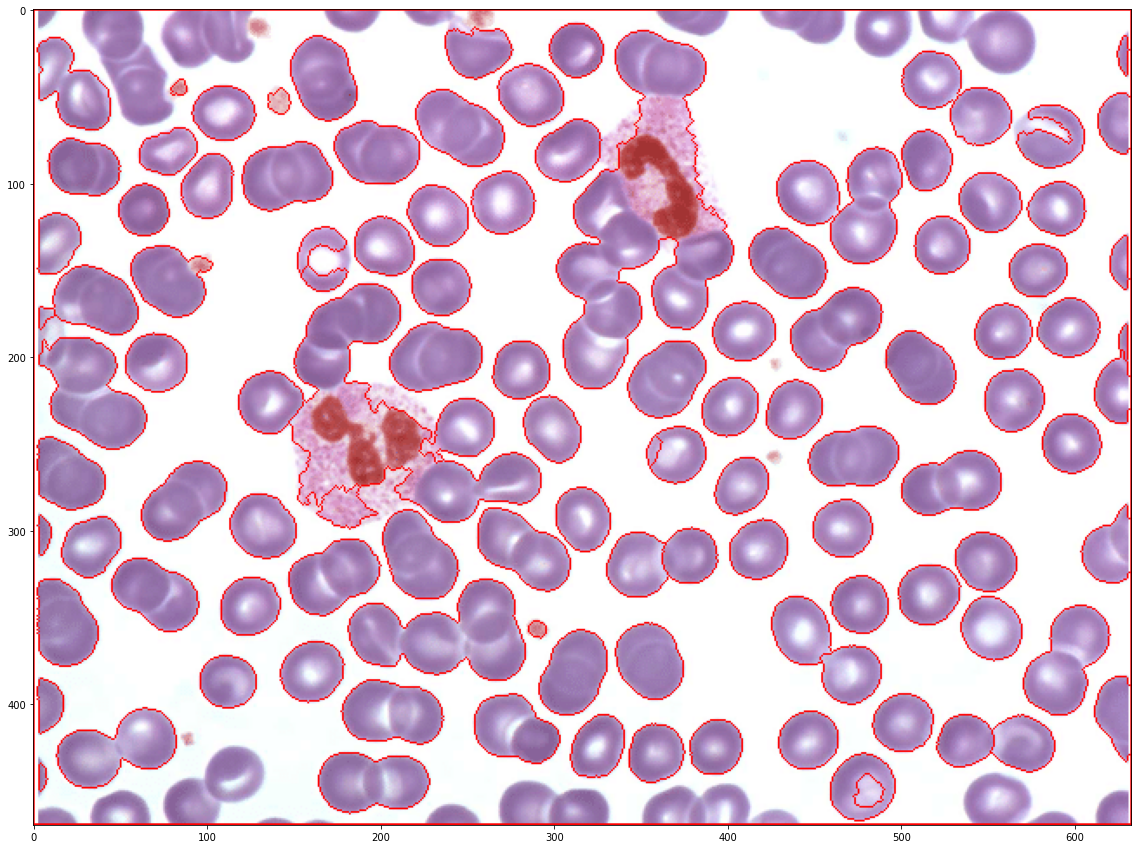

In [47]:
plt.figure(figsize=(20,15))
plt.imshow(img);